In [234]:
!pip install tensorflow
!pip install pandas
!pip install -U scikit-learn scipy matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


VERRANNO GENERATI 2 DF UNO DI TRAIN E L'ALTRO DI TEST , DEFINISCO ALL'INIZIO ENTRAMBI PER POI CONCENTRAMI AD OPERARE PRIMA SU QUELLO DI TRAIN E DOPO SU QUELLO DI TEST , INFINE VERRA APPLICATO L'ALGORIMO E GENERATI I RISULTATI .
LE OSSERVAZIONI FATTE SPESSO SONO DEI COMMENTI #  ,  SPESSO FACCIO STAMPARE DELLE VARIABILI A CASO , SO CHE PUO CREARE CONFUSIONE NELLA LETTURA DEL CODICE MA A ME È SERVITO PER CAPIRE MEGLIO TUTTI I PASSAGGI .

In [235]:
import numpy as np 
import pandas as pd 
import random
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import csv

import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Organization and Cleaning of data

## Dati di Train

In [236]:
dfTrain=pd.read_csv('file:///home/alessandro/Scrivania/mushrooms%20challenge%20conseganto/train.csv')

In [237]:
dfTrain  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,g,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,v,g
1,p,f,f,y,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,v,g
2,e,x,y,g,t,n,f,c,b,w,...,s,p,p,p,w,o,p,n,v,d
3,e,x,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,v,d
4,p,x,y,n,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,p,f,f,g,f,f,f,c,b,g,...,k,b,n,p,w,o,l,h,v,g
4870,p,k,s,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
4871,e,x,s,g,f,n,f,w,b,p,...,s,w,w,p,w,o,e,n,a,g
4872,p,f,s,e,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d


In [238]:
dfTrain["stalk-root"]

0       b
1       b
2       b
3       b
4       ?
       ..
4869    b
4870    ?
4871    e
4872    ?
4873    b
Name: stalk-root, Length: 4874, dtype: object

Ci sono dei parametri marcati con "?" , non vanno bene , li eliminerò.

In [239]:
dfTrain['stalk-root'].replace('?', np.NaN, inplace=True)  #inplace = True fondamentale per il salvataggio del cambiamento

In [240]:
dfTrain['stalk-root']

0         b
1         b
2         b
3         b
4       NaN
       ... 
4869      b
4870    NaN
4871      e
4872    NaN
4873      b
Name: stalk-root, Length: 4874, dtype: object

In [241]:
dfTrain.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  1499
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [242]:
#Rimuovo i valori mancanti (NaN)
dfTrain.dropna(inplace = True)

In [243]:
#controllo rimozione
dfTrain.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

ok i dati nulli NaN sono stati rimossi .

In [244]:
dfTrain.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Ora rimuovo tutte le righe ( in caso ci fossero ) duplicate . 

In [245]:
dfTrain.duplicated().sum()  #mi dice quante righe sono duplicate 

0

Non sembrano esserci .

Ora trasformerò i dati in valori dummie cosi da rendermi piu facile l'analisi sopratutto nella fase di addestramento . Ovviamente la stessa prassi sarà applicata ai dati di test .

In [246]:
tr2 = dfTrain
tr2['class'].replace(to_replace='p', value=1, inplace=True)  #velenoso
tr2['class'].replace(to_replace='e',  value=0, inplace=True) #non velenoso

Convertiti in 0 e 1 secondo il loro stato "class" 

In [247]:
tr2_dummies = pd.get_dummies(tr2)
tr2_dummies.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


## Dati di test

In [248]:
dfTest = pd.read_csv('file:///home/alessandro/Scrivania/mushrooms%20challenge%20conseganto/test.csv')

In [249]:
dfTest

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,f,s,b,t,n,f,c,b,w,...,s,w,e,p,w,t,e,w,c,w
1,e,b,f,w,f,n,f,w,b,g,...,k,w,w,p,w,t,p,w,n,g
2,e,f,y,b,t,n,f,c,b,w,...,s,e,w,p,w,t,e,w,c,w
3,e,f,s,w,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,a,g
4,p,x,s,b,t,f,f,c,b,p,...,s,w,w,p,w,o,p,h,v,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,p,x,s,g,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,u
1621,e,x,y,e,t,n,f,c,b,w,...,s,p,w,p,w,o,p,n,y,d
1622,e,x,f,g,f,n,f,c,n,g,...,s,w,w,p,w,o,p,n,y,u
1623,p,f,y,g,f,f,f,c,b,g,...,k,n,b,p,w,o,l,h,y,p


In [250]:
dfTest["stalk-root"]

0       ?
1       ?
2       ?
3       e
4       b
       ..
1620    b
1621    b
1622    e
1623    b
1624    b
Name: stalk-root, Length: 1625, dtype: object

In [251]:
dfTest['stalk-root'].replace('?', np.NaN, inplace=True)  #inplace = True fondamentale per il salvataggio del cambiamento

In [252]:
dfTest["stalk-root"]

0       NaN
1       NaN
2       NaN
3         e
4         b
       ... 
1620      b
1621      b
1622      e
1623      b
1624      b
Name: stalk-root, Length: 1625, dtype: object

In [253]:
dfTest.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                  508
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                       0
dtype: int64

In [254]:
dfTest.dropna(inplace = True)

In [255]:
#controllo rimozione
dfTest.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [256]:
dfTest.duplicated().sum()  #mi dice quante righe sono duplicate 

0

Non sembrano esserci righe duplicate

In [257]:
tes2 = dfTest
tes2['class'].replace(to_replace='p', value=1, inplace=True)  #velenoso
tes2['class'].replace(to_replace='e',  value=0, inplace=True) #non velenoso

In [258]:
tes2_dummies = pd.get_dummies(tes2)
tes2_dummies.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


### Che importanza hanno i dati ? Chi è piu importante di chi ?
Calcolerò la loro correlazione in questa parte di notebook e poi utilizzerò le statistiche per analizzare i dati piu importanti che mi fanno capire quando un fungo è velenoso oppure no

In [259]:
def Label_encode(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

La funzione Label econde ci aiuterà a normalizzare le etichette dato che sono della forma string. Il parametro passato alla funzione "feat" rappresenterà gli elementi di ogni colonna 
Tutto ciò avviene grazie a LabelEncoder che ci permette appunto di trasformare etichette non numeriche in etichette numeriche.
.fit ci consente di evitare ripetizioni tra letterali .

In [260]:
dfTrainxPlots = dfTrain.copy()
for col in dfTrainxPlots.columns:
    dfTrainxPlots[str(col)] = Label_encode(dfTrainxPlots[str(col)])
dfTrainxPlots

class [0 1]
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['g' 'h' 'k' 'n' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'g' 'n' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'g' 'n' 'p' 'w' 'y']
veil-type ['p']
veil-color ['w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'l' 'n' 'p']
spore-print-color ['h' 'k' 'n' 'r' 'u' 'w']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u']


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,3,1,2,1,0,0,7,...,0,5,5,0,0,1,3,0,4,1
1,1,2,0,7,0,2,1,0,0,4,...,1,0,3,0,0,1,1,0,4,1
2,0,5,3,3,1,5,1,0,0,7,...,2,4,4,0,0,1,3,2,4,0
3,0,5,3,2,1,5,1,0,0,6,...,2,2,5,0,0,1,3,1,4,0
5,0,2,0,2,1,5,1,0,0,7,...,2,2,4,0,0,1,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,0,5,3,2,1,5,1,0,0,4,...,2,4,5,0,0,1,3,2,5,0
4866,0,5,2,3,0,5,1,1,0,3,...,2,5,5,0,0,1,0,1,0,1
4869,1,2,0,3,0,2,1,0,0,0,...,1,0,3,0,0,1,1,0,4,1
4871,0,5,2,3,0,5,1,1,0,4,...,2,5,5,0,0,1,0,2,0,1


In [261]:
dfTrain

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,g,t,f,f,c,b,w,...,f,w,w,p,w,o,p,h,v,g
1,1,f,f,y,f,f,f,c,b,p,...,k,b,n,p,w,o,l,h,v,g
2,0,x,y,g,t,n,f,c,b,w,...,s,p,p,p,w,o,p,n,v,d
3,0,x,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,v,d
5,0,f,f,e,t,n,f,c,b,w,...,s,g,p,p,w,o,p,k,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,0,x,y,e,t,n,f,c,b,p,...,s,p,w,p,w,o,p,n,y,d
4866,0,x,s,g,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,a,g
4869,1,f,f,g,f,f,f,c,b,g,...,k,b,n,p,w,o,l,h,v,g
4871,0,x,s,g,f,n,f,w,b,p,...,s,w,w,p,w,o,e,n,a,g


Applicazione della funzione spiegata in precedenza

<AxesSubplot:>

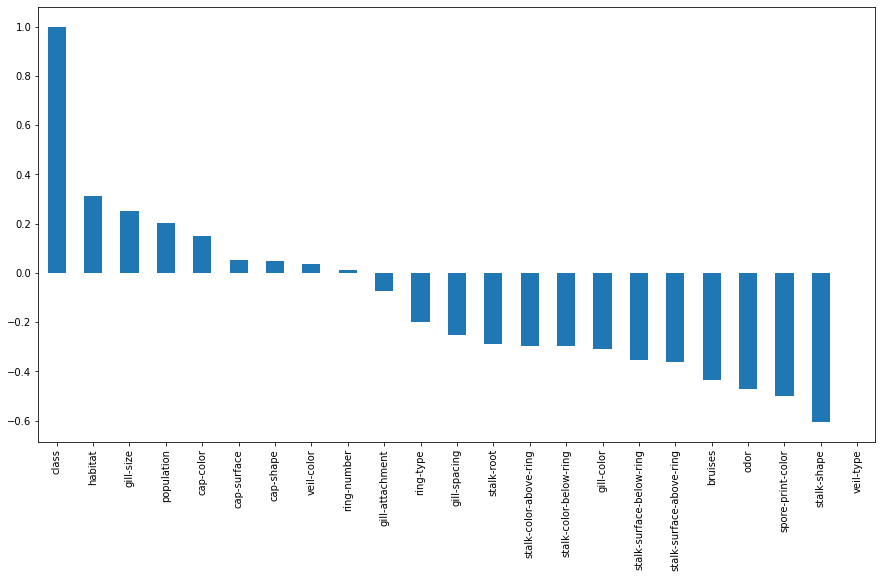

In [262]:
plt.figure(figsize=(15,8))
dfTrainxPlots.corr()['class'].sort_values(ascending = False).plot(kind='bar')

Una correlazione potrebbe essere positiva, nel senso che entrambe le variabili si muovono nella stessa direzione, o negativa, nel senso che quando il valore di una variabile aumenta, i valori delle altre variabili diminuiscono. La correlazione può anche essere neutra o zero, il che significa che le variabili non sono correlate. 

# Analisi dei dati

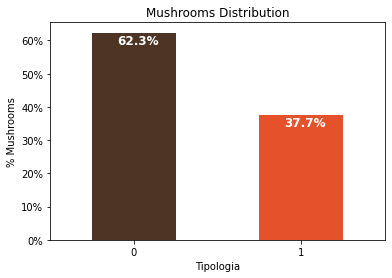

In [263]:
colors = ['#4D3425','#E4512B']
ax = (dfTrain['class'].value_counts()*100.0 /len(dfTrain)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Mushrooms')
ax.set_xlabel('Tipologia')
ax.set_ylabel('% Mushrooms')
ax.set_title('Mushrooms Distribution')

# creo un elenco per raccogliere i dati plt.patches
totals = []

#trova i valori e aggiungi alla lista
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width sinistra o destra; get_y su o giu
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of typologie of Mushrooms')

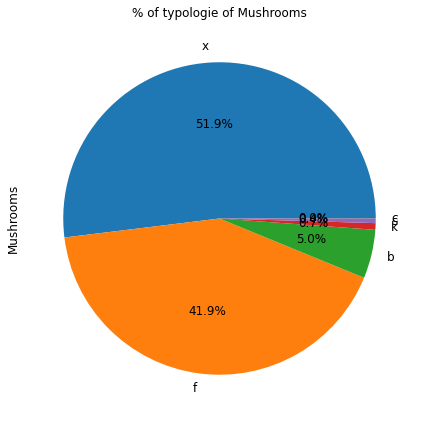

In [322]:
ax = (dfTrain['cap-shape'].value_counts()*100.0 /len(dfTrain))\
.plot.pie(autopct='%.1f%%', figsize =(7,12), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Mushrooms',fontsize = 12)
ax.set_title('% of typologie of Mushrooms', fontsize = 12)

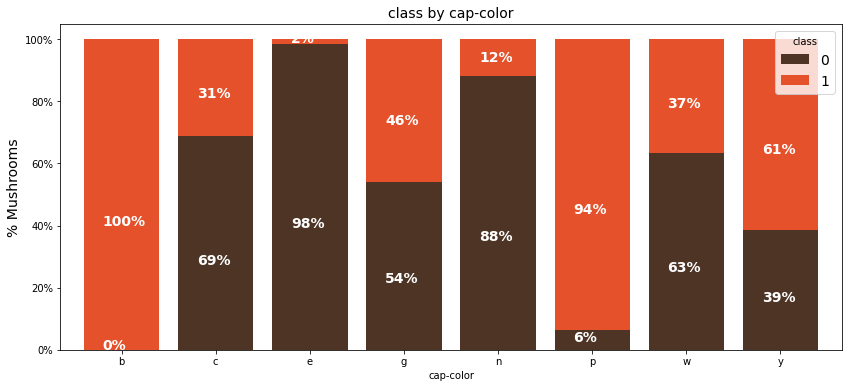

In [310]:
colors = ['#4D3425','#E4512B']
shape_class = dfTrain.groupby(['cap-color','class']).size().unstack()

ax = (shape_class.T*100.0 / shape_class.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'class')
ax.set_ylabel('% Mushrooms',size = 14)
ax.set_title('class by cap-color',size = 14)

# codice per aggiungere etich. al grafico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',  #numerelli
               weight = 'bold',
               size = 14)

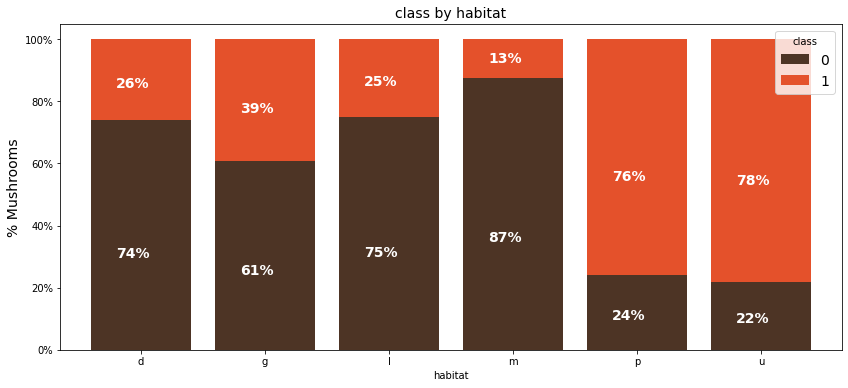

In [266]:
colors = ['#4D3425','#E4512B']
shape_class = dfTrain.groupby(['habitat','class']).size().unstack()

ax = (shape_class.T*100.0 / shape_class.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'class')
ax.set_ylabel('% Mushrooms',size = 14)
ax.set_title('class by habitat',size = 14)

# codice per aggiungere etich. al grafico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',  #numerelli
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Mushrooms by Habitat Type')

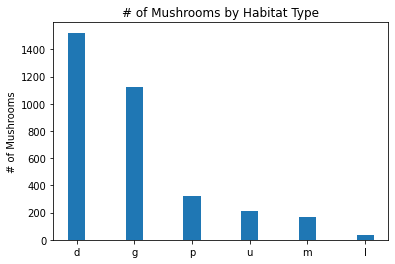

In [267]:
ax = dfTrain['habitat'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Mushrooms')
ax.set_title('# of Mushrooms by Habitat Type')

# Addestramento Dati

In [268]:
# Normalizzo nell'intervallo [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = tr2_dummies.columns # nomi di tutte le colonne
train_new = scaler.fit_transform(tr2_dummies)
train = pd.DataFrame(train_new, columns=names)

names = tes2_dummies.columns # nomi di tutte le colonne
test_new = scaler.fit_transform(tes2_dummies)
test = pd.DataFrame(test_new, columns=names)

In [269]:
train

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3372,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3373,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [295]:
test

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1114,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1115,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [277]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   class                       3375 non-null   float64
 1   cap-shape_b                 3375 non-null   float64
 2   cap-shape_c                 3375 non-null   float64
 3   cap-shape_f                 3375 non-null   float64
 4   cap-shape_k                 3375 non-null   float64
 5   cap-shape_s                 3375 non-null   float64
 6   cap-shape_x                 3375 non-null   float64
 7   cap-surface_f               3375 non-null   float64
 8   cap-surface_g               3375 non-null   float64
 9   cap-surface_s               3375 non-null   float64
 10  cap-surface_y               3375 non-null   float64
 11  cap-color_b                 3375 non-null   float64
 12  cap-color_c                 3375 non-null   float64
 13  cap-color_e                 3375 

In [278]:
test.info(10)  #manca cap_surface_g

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   class                       1117 non-null   float64
 1   cap-shape_b                 1117 non-null   float64
 2   cap-shape_c                 1117 non-null   float64
 3   cap-shape_f                 1117 non-null   float64
 4   cap-shape_k                 1117 non-null   float64
 5   cap-shape_s                 1117 non-null   float64
 6   cap-shape_x                 1117 non-null   float64
 7   cap-surface_f               1117 non-null   float64
 8   cap-surface_s               1117 non-null   float64
 9   cap-surface_y               1117 non-null   float64
 10  cap-color_b                 1117 non-null   float64
 11  cap-color_c                 1117 non-null   float64
 12  cap-color_e                 1117 non-null   float64
 13  cap-color_g                 1117 

In [282]:
train['cap-surface_g'] #verifico presenza

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3370    0.0
3371    0.0
3372    0.0
3373    0.0
3374    0.0
Name: cap-surface_g, Length: 3375, dtype: float64

In [304]:
numeroPrecisoCSg = train.astype(bool).sum(axis=0)   #conta i valori non nulli di cap surface G 
numeroPrecisoCSg["cap-surface_g"]

3

Come possiamo vedere nei dati train ha solo 3 valori diversi da 0 , cio significa che di tipologia G abbiamo solo 3 funghi su piu di 3000 ho deciso di elidere questa colonna poiche è inutile nell'analisi del dato .

In [281]:
test['cap-surface_g'] #ho notato che a mancare è proprio cap surface g nei dati di test poichè non è presente nemmeno una variabile g, quindi è inutile analizzarlo..
                      #lo elimino dalla tabella di train .

KeyError: 'cap-surface_g'

Da come è possibile vedere per i dati di test l'attributo G di cap-surface è inesistente . Infatti nella cella successiva provvedo ad eliminarlo .

In [287]:
x_train = train.drop(["class","cap-surface_g"], axis=1)
y_train = train["class"]

x_test = test.drop(["class"], axis=1)
y_test = test["class"]

In [288]:
x_train 

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3372,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [289]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

print("Accuracy: {:.3f}".format(tree.score(x_test, y_test)*100))

Accuracy: 100.000


## Applicazione algoritmo Random Forest Classifier 

In [290]:
rfc = RandomForestClassifier()  #definizione 

In [291]:
y_train

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3370    0.0
3371    0.0
3372    1.0
3373    0.0
3374    0.0
Name: class, Length: 3375, dtype: float64

In [292]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

La funzione .fit() crea il modello previsionale, ossia un classificatore che è in grado di classificare le istanze secondo l'addestramento ricevuto.

In [293]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
   
    print('PERFORMANCES :')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    print('\nFinal Accuracy Value:')
    return accuracy*100

La funzione evaluate calcola e restituisce tutti i valori utili per lo studio . Dopo l'addestramento sollecito il modello di predirre e classificare alcuni esempi di test (differenti da quelli di training) tramite la funzione pred() di Scikit-learn e verifico se risponde correttamente e li assegno alla variabile predictions. Successivamente calcolo gli errori e l'accuracy che ci indica la frazione dei campioni predetti correttamente.In questo caso il risultato è ottimo poichè risulta essere del 100%

In [294]:
evaluate(rfc, x_test, y_test)

PERFORMANCES :
Average Error: 0.0000 degrees.
Accuracy = 100.00%.

Final Accuracy Value:


100.0

Ho dato come parametri alla funzione "evaluate" quelli di test , dopo averla allenata con quelli di train

### Made by : Alessandro Giovannini mat.520310